<a href="https://colab.research.google.com/github/NehaNeha417/Self_project/blob/main/GTSRB_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2


print(tf.__version__)
print(os.listdir('/content/drive/My Drive/Data/Train'))

2.3.0
['3', '0', '2', '4', '1']


In [4]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

The OS module in python provides functions for interacting with the operating system.
 This module provides a portable way of using operating system dependent functionality. 

PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities.
PIL Library is used to open the image content into an array.

In [5]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
num = 5
n_inputs = height*width*channels

for i in range(num):
  path = '/content/drive/My Drive/Data/Train/{0}'.format(i)
  print(path)
  cl = os.listdir(path)
  for a in cl:
      #cv2.imread() method loads an image from the specified file.If image can't be read then, it will return empty matrix.
      img = cv2.imread(path+'/'+a)      
      img_arr = Image.fromarray(img,'RGB')    # Creates an image memory from an object exporting the array interface (using the buffer protocol).
      img_size = img_arr.resize((30,30))
      data.append(np.array(img_size))
      labels.append(i)

/content/drive/My Drive/Data/Train/0
/content/drive/My Drive/Data/Train/1
/content/drive/My Drive/Data/Train/2
/content/drive/My Drive/Data/Train/3
/content/drive/My Drive/Data/Train/4


In [6]:
x_train = np.array(data)
x_train = x_train/255.0

y_train = np.array(labels)         # 1D array is a vector
# to convert a class vector (integers) to a binary class matrix
y_train = to_categorical(y_train, num)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(10968, 30, 30, 3)
(4701, 30, 30, 3)



Size of image(30, 30, 3)
Class of image[0. 0. 0. 1. 0.]

Size of image(30, 30, 3)
Class of image[0. 1. 0. 0. 0.]

Size of image(30, 30, 3)
Class of image[0. 0. 0. 0. 1.]

Size of image(30, 30, 3)
Class of image[0. 1. 0. 0. 0.]

Size of image(30, 30, 3)
Class of image[0. 1. 0. 0. 0.]

Size of image(30, 30, 3)
Class of image[0. 1. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

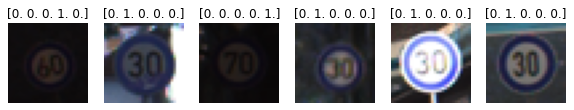

In [8]:
import matplotlib.pyplot as plt

def show_image(data, labels, no):
  fig, axes = plt.subplots(1, no, figsize=(10,10))
  # np.arange() returns an array with evenly spaced elements as per the interval. Default interval is 1
  axes = axes.ravel()
  for i in np.arange(0,no):
    k = int(random.random() * len(data))         # Return random floats from the “continuous uniform” distribution over the stated interval
    axes[i].axis("off")
    axes[i].imshow(data[k])
    axes[i].set_title(labels[k])
    print()
    #plt.title(labels[k])
    print('Size of image' +str(data[k].shape))
    print('Class of image' +str(labels[k]))
    
# to adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.4)
show_image(X_train, Y_train, 6)


The advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers. 

The architecture of the  model is:

2 Conv2D layer (filter=32, kernel_size=(3,3), activation=”relu”)
MaxPool2D layer ( pool_size=(2,2))
Dropout layer (rate=0.25)
 2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
MaxPool2D layer ( pool_size=(2,2))
Dropout layer (rate=0.25)
Flatten layer to squeeze the layers into 1 dimension
Dense Fully connected layer (256 nodes, activation=”relu”)
Dropout layer (rate=0.5)
Dense layer (43 nodes, activation=”softmax”)

In [9]:
model = keras.models.Sequential()               # Model groups layers into an object with training and inference features.
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(X_train.shape[1:]))) 
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs=10
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=epochs, verbose=1)

Epoch 1/10
343/343 [==============================] - 58s 169ms/step - loss: 1.0646 - accuracy: 0.5285 - val_loss: 0.1533 - val_accuracy: 0.9530
Epoch 2/10
343/343 [==============================] - 57s 166ms/step - loss: 0.1342 - accuracy: 0.9543 - val_loss: 0.0218 - val_accuracy: 0.9951
Epoch 3/10
343/343 [==============================] - 57s 167ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0135 - val_accuracy: 0.9968
Epoch 4/10
343/343 [==============================] - 57s 166ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0073 - val_accuracy: 0.9979
Epoch 5/10
343/343 [==============================] - 57s 166ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0098 - val_accuracy: 0.9981
Epoch 6/10
343/343 [==============================] - 57s 166ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0067 - val_accuracy: 0.9989
Epoch 7/10
343/343 [==============================] - 58s 168ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0055 - val_ac

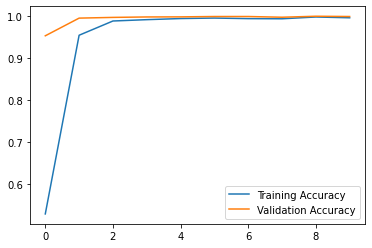

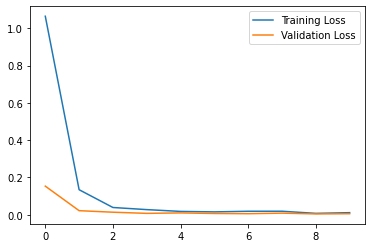

In [12]:
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
plt.figure(0)
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.figure(1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()

plt.show()

In [16]:
model.save_weights('/content/drive/My Drive/Data/GTSRB_wt.hdf5')

In [26]:
test_df = pd.read_csv("/content/drive/My Drive/Data/Test.csv")
img = test_df['Path'].values
labels = test_df['ClassId'].values
path = '/content/drive/My Drive/Data/Test'

data=[]
cls = os.listdir(path)
for i in cls:

  image = cv2.imread(path+'/'+i)
  image_arr = Image.fromarray(image, 'RGB')
  image_size = image_arr.resize((30,30))
  data.append(np.array(image_size))

X_test = np.array(data)
X_test = X_test.astype('float32')/255.0
Y_pred = model.predict_classes(X_test)


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,Y_pred))

0.045454545454545456
